# Problem 1 Part 2


In [ ]:
pip install --upgrade pip

In [ ]:
pip install setuptools==65.5.0

In [ ]:
!pip install d2l==1.0.0-beta0

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [6]:
class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

In [7]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)

In [8]:
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)

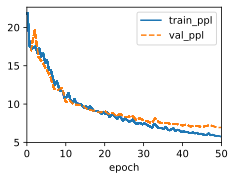

In [9]:
lstm0 = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model0 = d2l.RNNLM(lstm0, vocab_size=len(data.vocab), lr=4)
trainer.fit(model0, data)

In [10]:
model0.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has the time traveller '

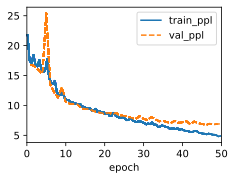

In [11]:
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=128)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [20]:
model.predict('good morning', 20, data.vocab, d2l.try_gpu())

'good morning the time traveller '

# Problem 1 Part 3

In [13]:
class RNNLMScratch(d2l.Classifier):
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

In [14]:
#Building the RNN model
from torch.nn import functional as F

class RNN(d2l.Module):
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [16]:
class RNNLM(d2l.RNNLMScratch):
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

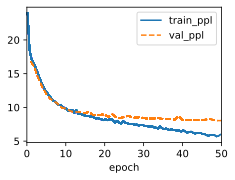

In [19]:
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=128)
model2 = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model2, data)

In [21]:
model2.predict('good morning', 20, data.vocab, d2l.try_gpu())

'good morning an ther and he prec'